In [ ]:
!pip install numpy pandas tensorflow scikit-learn gradio

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 12.6 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 12.8 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 13.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 12.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 12.8 MB/s eta 0:00:00

   ------ --------------------------------- 1/6 [kiwisolver]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/6 [fonttools]
   ------------- -------------------------- 2/

C:\Users\Brundha\AppData\Local\Temp\ipykernel_7032\3073585570.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment_text'].fillna("", inplace=True)


Epoch 1/10


c:\Users\Brundha\miniconda3\envs\myenv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - accuracy: 0.3160 - loss: 0.5301 - val_accuracy: 0.9760 - val_loss: 0.3465
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.6008 - loss: 0.3755 - val_accuracy: 0.9760 - val_loss: 0.2890
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6960 - loss: 0.2897 - val_accuracy: 0.9760 - val_loss: 0.2471
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6995 - loss: 0.2183 - val_accuracy: 0.9760 - val_loss: 0.2220
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7285 - loss: 0.1842 - val_accuracy: 0.9760 - val_loss: 0.2175
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7840 - loss: 0.1620 - val_accuracy: 0.9760 - val_loss: 0.2001
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.7617 - loss: 0.1449 - val_accuracy: 0.9760 - val_loss: 0.1971
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.7897 - loss: 0.1288 - val_accuracy: 0.9760 - val_loss: 0.

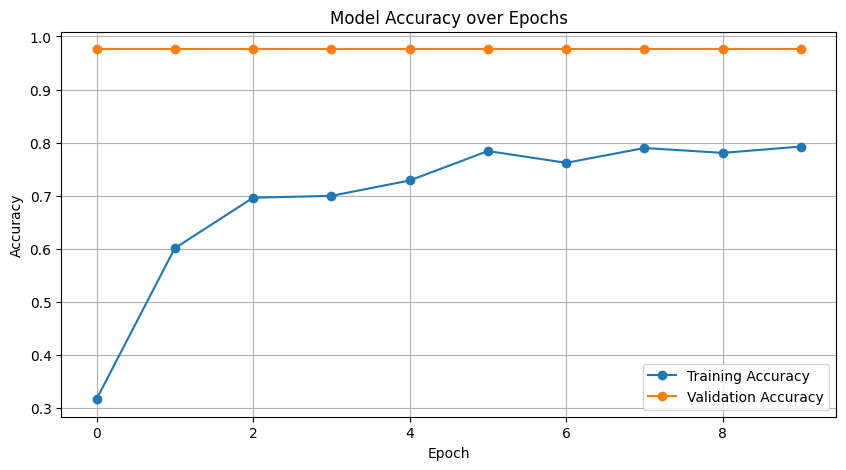

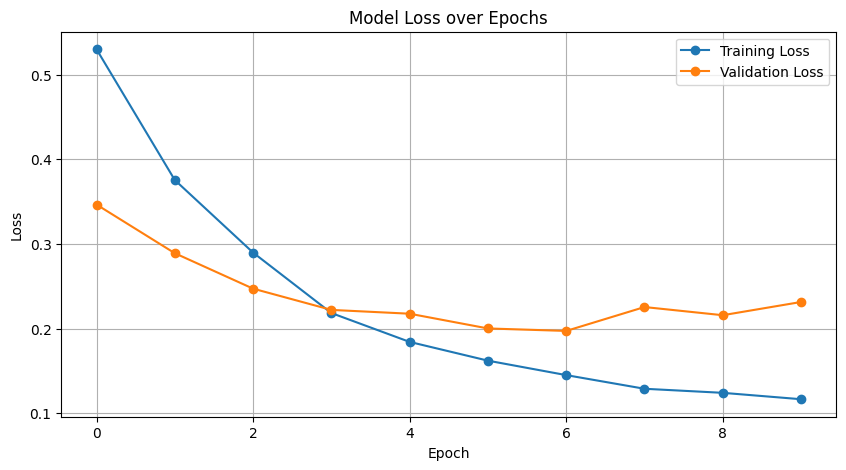

In [ ]:
!pip install numpy pandas tensorflow scikit-learn matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
import pickle

# ✅ Load Dataset
df = pd.read_csv('C:/Users/Brundha/Downloads/final_extended_toxic_comments_train/final_extended_toxic_comments_train.csv')

# ✅ Reduce dataset size for faster CPU training
df = df.sample(5000, random_state=42)  # Train on only 5k samples

df['comment_text'].fillna("", inplace=True)

# ✅ Tokenization
MAX_NUM_WORDS = 10000  
MAX_SEQUENCE_LENGTH = 100  
EMBEDDING_DIM = 50  

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['comment_text'].values)
sequences = tokenizer.texts_to_sequences(df['comment_text'].values)
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Simplified Model (Fast for CPU)
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

# ✅ Compile and Train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# ✅ Save Model and Tokenizer
model.save('toxic_comment_model_fast.h5')
with open('tokenizer_fast.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# ✅ Plot Graphs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
import pickle

# ✅ Load Dataset
df = pd.read_csv('C:/Users/Brundha/Downloads/final_extended_toxic_comments_train/final_extended_toxic_comments_train.csv')

# ✅ Reduce dataset size for faster CPU training
df = df.sample(5000, random_state=42)  # Train on only 5k samples

df['comment_text'].fillna("", inplace=True)

# ✅ Tokenization
MAX_NUM_WORDS = 10000  
MAX_SEQUENCE_LENGTH = 100  
EMBEDDING_DIM = 50

tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(df['comment_text'].values)
sequences = tokenizer.texts_to_sequences(df['comment_text'].values)
X = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

y = df[['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']].values

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Simplified Model (Fast for CPU)
model = Sequential()
model.add(Embedding(MAX_NUM_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(64))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='sigmoid'))

# ✅ Compile and Train
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_val, y_val), verbose=1)

# ✅ Evaluate Model on Validation Data
y_pred = model.predict(X_val)
y_pred_binary = (y_pred > 0.5).astype(int)

# ✅ Calculate Metrics (Macro = average across labels)
f1 = f1_score(y_val, y_pred_binary, average='macro')
precision = precision_score(y_val, y_pred_binary, average='macro')
recall = recall_score(y_val, y_pred_binary, average='macro')
accuracy = accuracy_score(y_val, y_pred_binary)

print("\n🔍 Model Evaluation Metrics:")
print(f"Accuracy  : {accuracy:.4f}")
print(f"Precision : {precision:.4f}")
print(f"Recall    : {recall:.4f}")
print(f"F1 Score  : {f1:.4f}")

# ✅ Save Model and Tokenizer
model.save('toxic_comment_model_fast.h5')
with open('tokenizer_fast.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# ✅ Plot Graphs
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
plt.plot(history.history['loss'], label='Training Loss', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Brundha\AppData\Local\Temp\ipykernel_6560\617808155.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['comment_text'].fillna("", inplace=True)


Epoch 1/10


c:\Users\Brundha\miniconda3\envs\myenv\lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - accuracy: 0.6985 - loss: 0.5449 - val_accuracy: 0.9760 - val_loss: 0.3511
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5558 - loss: 0.3990 - val_accuracy: 0.9760 - val_loss: 0.3276
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6787 - loss: 0.3652 - val_accuracy: 0.9760 - val_loss: 0.3023
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.7588 - loss: 0.3144 - val_accuracy: 0.9760 - val_loss: 0.2560
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.7847 - loss: 0.2436 - val_accuracy: 0.9760 - val_loss: 0.2190
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8110 - loss: 0.1882 - val_accuracy: 0.9760 - val_loss: 0.2057
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.8485 - loss: 0.1588 - val_accuracy: 0.9760 - val_loss: 0.1940
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.8673 - loss: 0.1361 - val_accuracy: 0.9760 - val_loss: 0.

c:\Users\Brundha\miniconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])



🔍 Model Evaluation Metrics:
Accuracy  : 0.6990
Precision : 0.4770
Recall    : 0.3205
F1 Score  : 0.3585


<Figure size 1000x500 with 1 Axes>

<Figure size 1000x500 with 1 Axes>

In [ ]:
!pip install gradio --upgrade

import numpy as np
import gradio as gr
import pickle
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ✅ Load model and tokenizer (use full path)
model = load_model('C:/Users/Brundha/Downloads/toxic_comment_model_fast.h5')

with open('C:/Users/Brundha/Downloads/tokenizer_fast.pkl', 'rb') as handle:
    tokenizer = pickle.load(handle)

MAX_SEQUENCE_LENGTH = 100
toxicity_labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']

# ✅ Prediction function
def predict_toxicity(comment):
    seq = tokenizer.texts_to_sequences([comment])
    data = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
    prediction = model.predict(data)[0]
    result = {label: round(pred, 2) for label, pred in zip(toxicity_labels, prediction)}
    return result

# ✅ Gradio UI
interface = gr.Interface(
    fn=predict_toxicity,
    inputs=gr.Textbox(lines=2, placeholder="Enter a comment to check for toxicity"),
    outputs="json",
    title="Comment Toxicity Detector",
    description="Enter a comment, and this tool predicts types of toxicity like 'toxic', 'obscene', or 'insult'."
)

interface.launch()


   ---------------------------------------- 0.0/63.5 MB ? eta -:--:--
   - -------------------------------------- 1.8/63.5 MB 11.2 MB/s eta 0:00:06
   -- ------------------------------------- 4.5/63.5 MB 11.7 MB/s eta 0:00:06
   ---- ----------------------------------- 7.1/63.5 MB 12.1 MB/s eta 0:00:05
   ------ --------------------------------- 9.7/63.5 MB 12.3 MB/s eta 0:00:05
   ------- -------------------------------- 12.3/63.5 MB 12.2 MB/s eta 0:00:05
   --------- ------------------------------ 15.2/63.5 MB 12.4 MB/s eta 0:00:04
   ----------- ---------------------------- 17.8/63.5 MB 12.4 MB/s eta 0:00:04
   ------------ --------------------------- 20.2/63.5 MB 12.4 MB/s eta 0:00:04
   -------------- ------------------------- 23.1/63.5 MB 12.4 MB/s eta 0:00:04
   ---------------- ----------------------- 26.2/63.5 MB 12.7 MB/s eta 0:00:03
   ------------------ --------------------- 29.6/63.5 MB 13.0 MB/s eta 0:00:03
   -------------------- ------------------- 33.0/63.5 MB 13.2 MB/

c:\Users\Brundha\miniconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
